In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv("Myntra Fasion Clothing.csv ")

In [3]:
data.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0


In [4]:
data.dtypes

URL                       object
Product_id                 int64
BrandName                 object
Category                  object
Individual_category       object
category_by_Gender        object
Description               object
DiscountPrice (in Rs)    float64
OriginalPrice (in Rs)    float64
DiscountOffer             object
SizeOption                object
Ratings                  float64
Reviews                  float64
dtype: object

In [107]:
data.isnull().sum()

URL                           0
Product_id                    0
BrandName                     0
Category                      0
Individual_category           0
category_by_Gender            0
Description                   0
DiscountPrice (in Rs)    193158
OriginalPrice (in Rs)         0
DiscountOffer             74306
SizeOption                    0
Ratings                  336152
Reviews                  336152
features                      0
dtype: int64

In [113]:
data.describe()

,Product_id,DiscountPrice (in Rs),OriginalPrice (in Rs),Ratings,Reviews
count,5.265640e+05,333406.000000,526564.000000,190412.000000,190412.000000
mean,1.506939e+07,1237.444401,2414.068615,4.094892,61.990820
std,3.225710e+06,1052.063517,1916.962914,0.494158,125.714537
min,2.739900e+04,127.000000,99.000000,1.000000,0.000000
25%,1.388053e+07,659.000000,1299.000000,3.900000,8.000000
50%,1.597106e+07,952.000000,1999.000000,4.200000,18.000000
75%,1.734741e+07,1469.000000,2899.000000,4.400000,52.000000
max,1.846435e+07,27996.000000,90000.000000,5.000000,999.000000


In [114]:
data.describe(include=object)

,URL,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountOffer,SizeOption,features
count,526564,526564,526564,526564,526564,526564,452258,526564,526564
unique,526564,2088,8,92,2,429766,1418,3588,431108
top,https://www.myntra.com/jeans/snitch/snitch-men...,Pothys,Indian Wear,tshirts,Women,kanvin women pack of 2 printed pure cotton lou...,50% OFF,"S, M, L, XL, XXL",Women Lingerie & Sleep Wear lounge-pants kan...
freq,1,16005,145845,61198,339185,546,52737,84643,546


<AxesSubplot:>

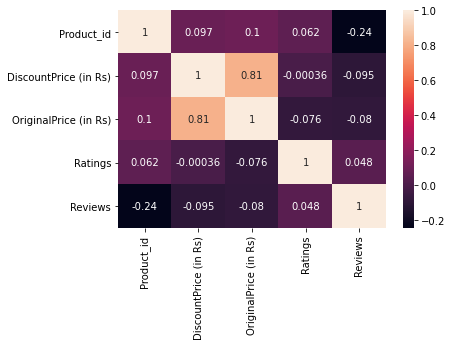

In [110]:
sns.heatmap(data.corr(),annot=True)

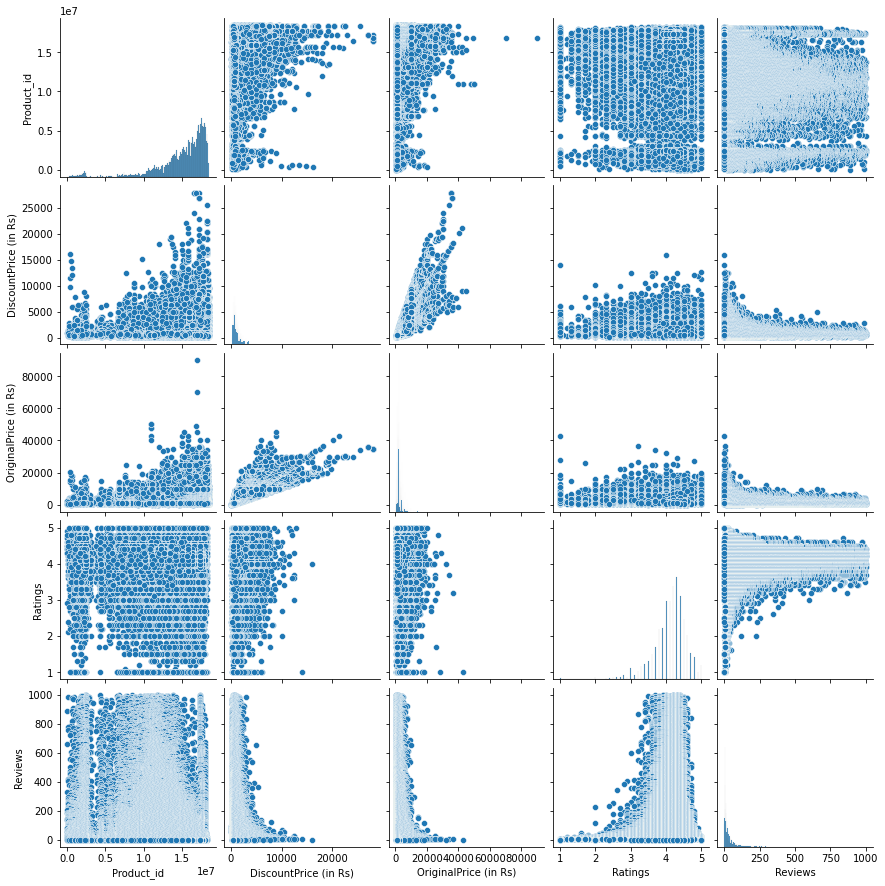

In [111]:
sns.pairplot(data)

In [5]:
data["features"] = data['category_by_Gender'] + ' ' +  data['Category'] + '  ' + data['Individual_category'] +  '  ' + data['Description'] 
data.head()

,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews,features
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0,Men Bottom Wear jeans roadster men navy blue...
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0,Men Bottom Wear track-pants locomotive men b...
2,https://www.myntra.com/shirts/roadster/roadste...,11895958,Roadster,Topwear,shirts,Men,roadster men navy white black geometric print...,629.0,1399.0,55% OFF,"38, 40, 42, 44, 46, 48",4.3,999.0,Men Topwear shirts roadster men navy white ...
3,https://www.myntra.com/shapewear/zivame/zivame...,4335679,Zivame,Lingerie & Sleep Wear,shapewear,Women,zivame women black saree shapewear zi3023core0...,893.0,1295.0,31% OFF,"S, M, L, XL, XXL",4.2,999.0,Women Lingerie & Sleep Wear shapewear zivame...
4,https://www.myntra.com/tshirts/roadster/roadst...,11690882,Roadster,Western,tshirts,Women,roadster women white solid v neck pure cotton ...,NaN,599.0,35% OFF,"XS, S, M, L, XL",4.2,999.0,Women Western tshirts roadster women white s...


# what are some of the most valuable purchases by indivdual category on our site?

<AxesSubplot:>

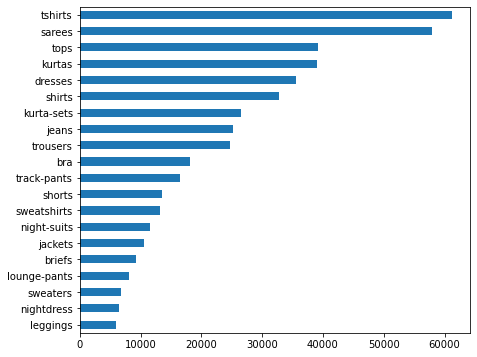

In [92]:
plt.figure(figsize=(7,6))
data.Individual_category.value_counts().head(20).sort_values().plot(kind='barh')

# what are some of the most valuable purchases by Category on our site?

<AxesSubplot:>

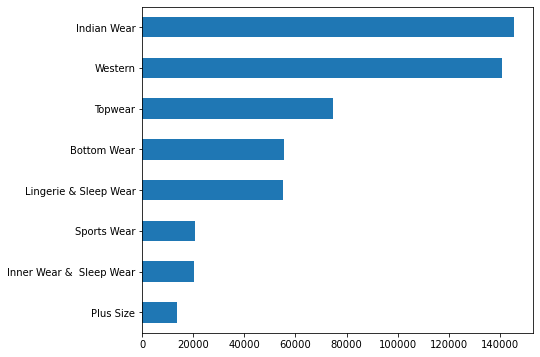

In [12]:
plt.figure(figsize=(7,6))
data.Category.value_counts().sort_values().plot(kind='barh')

# which Gender is likely to have more puechase on our website?

<AxesSubplot:>

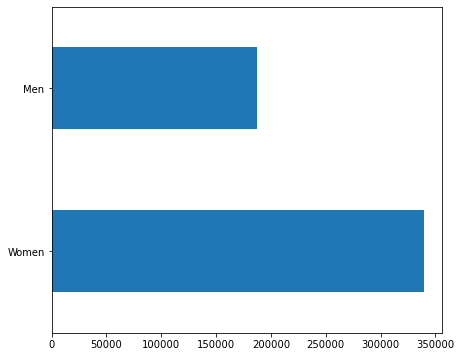

In [8]:
plt.figure(figsize=(7,6))
data.category_by_Gender.value_counts().plot(kind='barh')

In [94]:
#Women are more in quantity

# What are the discounts provided on our provided,can you list more frequent discount we offer?

<AxesSubplot:>

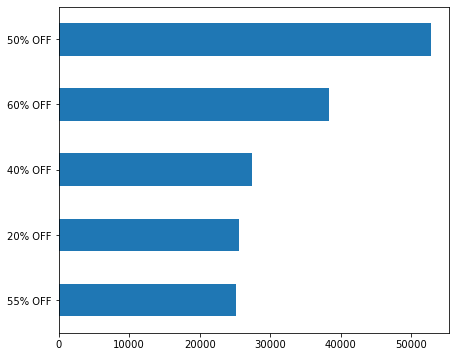

In [11]:
plt.figure(figsize=(7,6))
data.DiscountOffer.value_counts().head(5).sort_values().plot(kind='barh')

# Which items has highest ratings in individual category?

In [25]:
plt.figure(figsize=(7,6))
data.groupby("Individual_category")['Ratings'].mean().sort_values(ascending=False).head(10)

Individual_category
sleepsuit               4.500000
thermal-tops            4.358621
lounge-tshirts          4.322321
earrings                4.281667
lounge-shorts           4.279179
lingerie-accessories    4.269231
rain-jacket             4.256250
socks                   4.252158
harem-pants             4.250000
slips                   4.250000
Name: Ratings, dtype: float64

<Figure size 504x432 with 0 Axes>

<AxesSubplot:ylabel='Individual_category'>

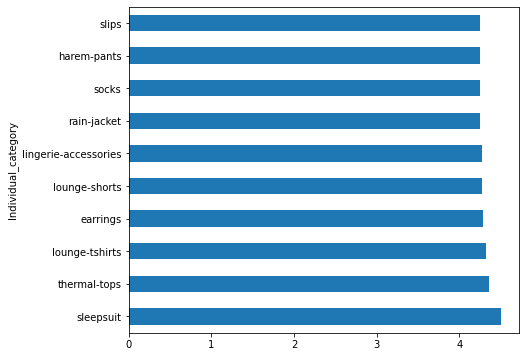

In [26]:
plt.figure(figsize=(7,6))
data.groupby("Individual_category")['Ratings'].mean().sort_values(ascending=False).head(10).plot(kind='barh')

# Can you see what are the rating distrinbution between men and women?

In [27]:
plt.figure(figsize=(7,6))
data.groupby("category_by_Gender")['Ratings'].mean()

category_by_Gender
Men      4.094858
Women    4.094912
Name: Ratings, dtype: float64

<Figure size 504x432 with 0 Axes>

# Which items has highest ratings in category?


<AxesSubplot:ylabel='Category'>

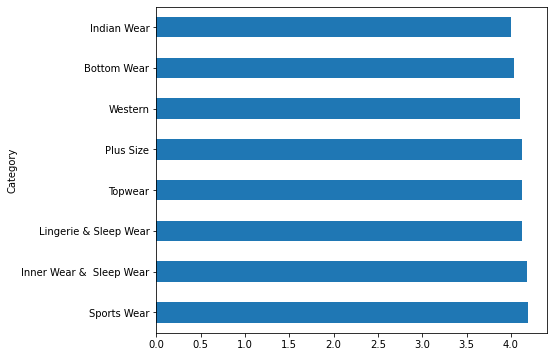

In [32]:
plt.figure(figsize=(7,6))
data.groupby("Category")['Ratings'].mean().sort_values(ascending=False).plot(kind='barh')

# Which Categories have highest Ratings?

In [96]:
data.groupby("Category")['Ratings'].mean().sort_values(ascending=False)

Category
Sports Wear                 4.198555
Inner Wear &  Sleep Wear    4.186591
Lingerie & Sleep Wear       4.131093
Topwear                     4.130325
Plus Size                   4.127853
Western                     4.099510
Bottom Wear                 4.034112
Indian Wear                 4.006331
Name: Ratings, dtype: float64

In [95]:
#Sports wear

# Most number of available cloths are of which brand in our website?

<AxesSubplot:>

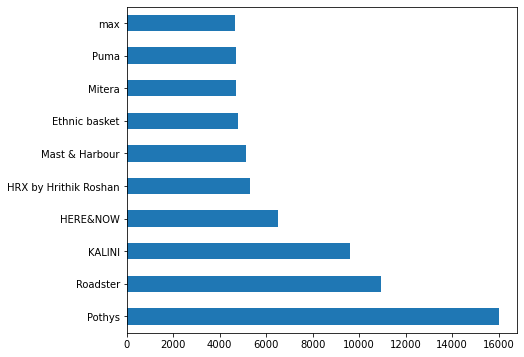

In [45]:
plt.figure(figsize=(7,6))

data.BrandName.value_counts().sort_values(ascending=False).head(10).plot(kind="barh")

# What are most available size bucket available in our website?

<AxesSubplot:>

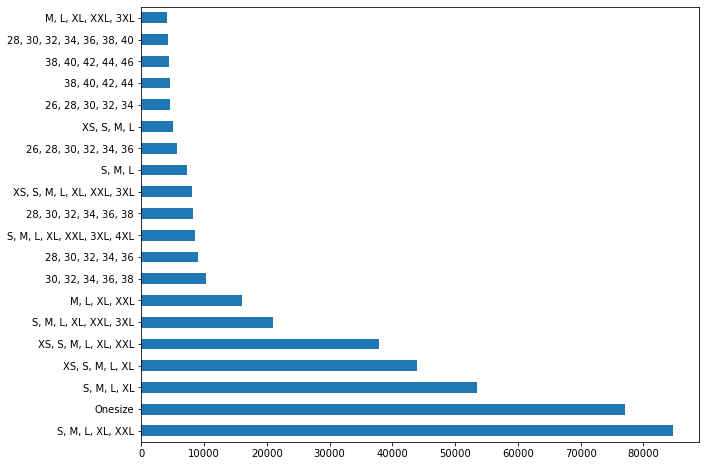

In [54]:
plt.figure(figsize=(10,8))

data.SizeOption.value_counts().head(20).plot(kind="barh")

# Which brand sales mostly Indian wear?

In [61]:
data.groupby(['BrandName','Category']).size().sort_values(ascending=False).head(10).reset_index(name='count')

,BrandName,Category,count
0,Pothys,Indian Wear,16005
1,KALINI,Indian Wear,9517
2,Roadster,Western,6048
3,Ethnic basket,Indian Wear,4790
4,Mitera,Indian Wear,4694
5,SOJANYA,Indian Wear,3553
6,DEYANN,Indian Wear,3538
7,Anouk,Indian Wear,3526
8,URBANIC,Western,3416
9,HERE&NOW,Plus Size,3298


# Which Brand has more available clothing options for women and men?

In [62]:
data.groupby(['BrandName','category_by_Gender']).size().sort_values(ascending=False).head(10).reset_index(name='count')

,BrandName,category_by_Gender,count
0,Pothys,Women,16005
1,KALINI,Women,9589
2,Roadster,Women,6186
3,Ethnic basket,Women,4790
4,Roadster,Men,4749
5,Mitera,Women,4695
6,DressBerry,Women,4640
7,Sangria,Women,4439
8,SOJANYA,Men,4124
9,URBANIC,Women,4122


In [103]:
#pothy for women
#Roadster for men

# Which category is mostly available in our site for men and women?

In [63]:
data.groupby(['Category','category_by_Gender']).size().sort_values(ascending=False).head(10).reset_index(name='count')

,Category,category_by_Gender,count
0,Western,Women,140992
1,Indian Wear,Women,119911
2,Topwear,Men,74537
3,Bottom Wear,Men,55439
4,Lingerie & Sleep Wear,Women,55258
5,Indian Wear,Men,25934
6,Inner Wear & Sleep Wear,Men,20370
7,Plus Size,Women,11791
8,Sports Wear,Women,11233
9,Sports Wear,Men,9394


In [104]:
#Western for women
#Topwear for men

# Which Category of Gender is receiving more discount offer?

In [67]:
data.groupby(['category_by_Gender',"DiscountOffer"]).size().sort_values(ascending=False).head(10).reset_index(name='count')

,category_by_Gender,DiscountOffer,count
0,Women,50% OFF,34850
1,Women,60% OFF,24546
2,Men,50% OFF,17887
3,Women,20% OFF,16743
4,Women,55% OFF,15405
5,Women,70% OFF,15307
6,Men,40% OFF,14278
7,Men,60% OFF,13739
8,Women,40% OFF,13070
9,Women,30% OFF,12255


In [105]:
# Women having large discount range